## fits 파일 시각화

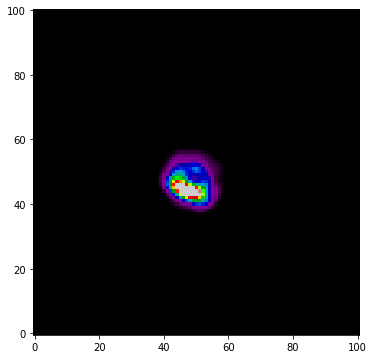

In [7]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
place_p = "/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/Data.0/Private/Band1/NoLensImage/imageEUC_VIS-100002.fits"
place_d = "D:\\GLC_dataset\\train\\Data.0\\Data.0\\Private\Band1\\NoLensImage\\imageEUC_VIS-100002.fits"
hdulist = fits.open(place_d)
data = hdulist[0].data
header = hdulist[0].header

graph = np.array(data, dtype=np.float32)

max_value = np.percentile(graph, 99.8)
min_value = np.percentile(graph, 10)

plt.figure(figsize=(8,6))
image_matplotlib = plt.imshow(graph, cmap='nipy_spectral', vmax=max_value, vmin=min_value, origin='lower')
plt.show()

In [5]:
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  101 / length of data axis 1                          
NAXIS2  =                  101 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
WCSAXES =                    2 / number of World Coordinate System axes         
CRPIX1  =                  51. / x-coordinate of reference pixel                
CRPIX2  =                  51. / y-coordinate of reference pixel                
CRVAL1  =                   0. / first axis value at reference pixel            
CRVAL2  =                   

In [11]:
graph[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# 데이터 병합

In [10]:
from astropy.table import Table
import astropy.io.fits as fits
import numpy as np

# loads the catalog
#cat_p = Table.read('/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/classifications.csv')
cat_d = Table.read("D:\\GLC_dataset\\train\\classifications.csv")
d_array = np.zeros((20000, 1, 101, 101))

file_p1 = '/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/Data.0/Public/Band1/imageEUC_VIS-'
file_p2 =  '/Users/munpyeong-an/Documents/학교/1학기/CRA 방학프로젝트/방학 전 계획/수집 폴더/데이터셋/SpaceBasedTraining/Data.1/Public/Band1/imageEUC_VIS-'
file_d1 = "D:\\GLC_dataset\\train\\Data.0\\Data.0\\Private\Band1\\NoLensImage\\imageEUC_VIS-"
file_d2 = "D:\\GLC_dataset\\train\\Data.1\\Data.1\\Private\Band1\\NoLensImage\\imageEUC_VIS-"
# loads the images
for i, id in enumerate(cat_d['ID']):
  try:
    ims = fits.open(file_d1+str(id)+'.fits')
    data = ims[0].data
    d_array[i] = np.array(data)
  except IOError:
    ims = fits.open(file_d2+str(id)+'.fits')
    data = ims[0].data
    d_array[i] = np.array(data)

# Concatenate images to catalog
cat_d['image'] = d_array[i]

cat_d.write('catalogs.hdf5', path='\space', append=True)

In [10]:
from astropy.table import Table

# Loads the table created in the previous section
d = Table.read('catalogs.hdf5')

In [11]:
d

ID,is_lens,Einstein_area,numb_pix_lensed_image,flux_lensed_image_in_sigma,"image [101,101]"
int64,int64,float64,int64,float64,float64
100000,1,8.63376e-10,171,195.429,7.714997802936441e-13 .. 2.900503730425552e-13
100001,1,1.31789e-10,294,855.589,7.714997802936441e-13 .. 2.900503730425552e-13
100002,1,4.87725e-12,140,486.113,7.714997802936441e-13 .. 2.900503730425552e-13
100003,1,1.44016e-09,1500,10467.4,7.714997802936441e-13 .. 2.900503730425552e-13
100004,0,2.19735e-11,0,0.0,7.714997802936441e-13 .. 2.900503730425552e-13
100005,0,2.80493e-10,0,0.0,7.714997802936441e-13 .. 2.900503730425552e-13
100006,0,2.26143e-10,0,0.0,7.714997802936441e-13 .. 2.900503730425552e-13
100007,1,1.46681e-10,213,829.363,7.714997802936441e-13 .. 2.900503730425552e-13
100008,1,5.51284e-11,812,9446.66,7.714997802936441e-13 .. 2.900503730425552e-13


# 모델

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

ModuleNotFoundError: No module named 'tensorflow'